## Convolutional Neural Networks (CNNs) and Computer Vision - [Flowers Dataset](http://www.robots.ox.ac.uk/~vgg/data/flowers/17/)

Here We will look at
- Deep Neural networks & Convolutional Neural Networks (CNNs)
- Building a flower species with CNNs using Tensorflow
- Semantic image segmentation fundamentals
- Flower segmentation with CNNs & Tensorflow

- How do neural networks work
- Bckpropagation
- Stochastic Gradient Descent (SGD)
- Convolutional neural networks

<img src="resources/neuralnet.png" alt="neuralnet" width="70%" height="70%" border="1" />

Important thing about non-linearity is that it allows us to model non-linear data

<img src="resources/sigmoid.png" alt="sigmoid" width="70%" height="70%" border="1" />
<img src="resources/relu.png" alt="relu" width="70%" height="70%" border="1" />
<img src="resources/sgd.png" alt="sgd" width="70%" height="70%" border="1" />

<img src="resources/cnn.png" alt="cnn" width="70%" height="70%" border="1" />

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Reshape
from keras.layers import Conv2D, MaxPooling2D, Deconvolution2D
import os, glob
import PIL
from PIL import Image
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [23]:
def load_flower_data():
    X = []
    y = []
    for f_name in glob.glob("data/jpg/*.jpg"):
        class_index = (int(f_name.split('image_')[1][0:4])-1)/80
        class_index_one_hot = keras.utils.to_categorical(class_index, 17)
        image = Image.open(f_name)
        image = image.resize((32, 32))
        image = np.asarray(image).astype('float32')/255.
        X.append(image)
        y.append(class_index_one_hot)
        #print ("class_index:",class_index)
        #print ("class_index_one_hot:",class_index_one_hot)
    X, y = np.array(X), np.array(y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    return X_train, X_test, y_train, y_test

In [24]:
X_train, X_test, y_train, y_test = load_flower_data()

In [25]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

('X_train shape:', (911, 32, 32, 3))
('X_test shape:', (449, 32, 32, 3))
('y_train shape:', (911, 17))
('y_test shape:', (449, 17))


In [26]:
#y_train

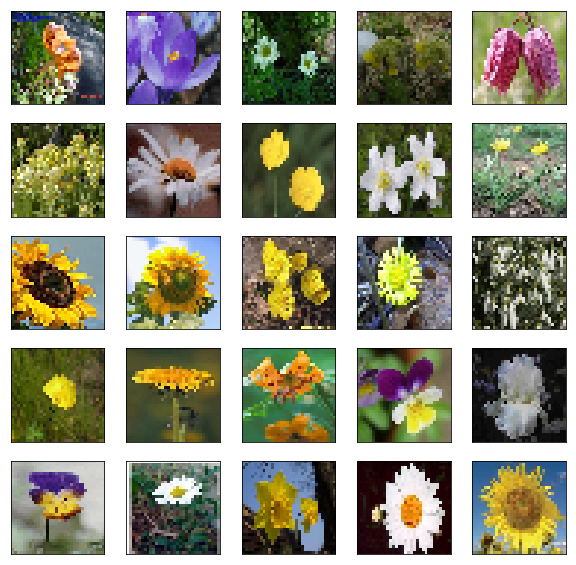

In [27]:
fig = plt.figure(figsize=(10,10))

for i in range(0,25):
    ax = fig.add_subplot(5, 5, i+1, xticks=[], yticks=[])
    ax.imshow(X_train[i,:].reshape(32, 32, 3), interpolation='nearest')

plt.show()

In [30]:
batch_size = 32
epochs = 10
num_classes = 17

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

opt = keras.optimizers.Adam(lr=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_7 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_8 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 64)        18496     
__________

In [32]:
#train the model
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(X_test, y_test),
          shuffle=True)

Train on 911 samples, validate on 449 samples
Epoch 1/10
911/911 [==============================] - 69s 76ms/step - loss: 2.8181 - acc: 0.0757 - val_loss: 2.8029 - val_acc: 0.1047
Epoch 2/10
911/911 [==============================] - 73s 80ms/step - loss: 2.7681 - acc: 0.1284 - val_loss: 2.7146 - val_acc: 0.1804
Epoch 3/10
911/911 [==============================] - 77s 85ms/step - loss: 2.6104 - acc: 0.1921 - val_loss: 2.4289 - val_acc: 0.2116
Epoch 4/10
911/911 [==============================] - 75s 83ms/step - loss: 2.3568 - acc: 0.2075 - val_loss: 2.1978 - val_acc: 0.3073
Epoch 5/10
911/911 [==============================] - 73s 80ms/step - loss: 2.2365 - acc: 0.2338 - val_loss: 2.0909 - val_acc: 0.3096
Epoch 6/10
911/911 [==============================] - 70s 77ms/step - loss: 2.1440 - acc: 0.3041 - val_loss: 2.0107 - val_acc: 0.3586
Epoch 7/10
911/911 [==============================] - 74s 81ms/step - loss: 2.0268 - acc: 0.3205 - val_loss: 1.9077 - val_acc: 0.4009
Epoch 8/10
911/9

In [33]:
# Score trained model.
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

449/449 [==============================] - 11s 25ms/step
('Test loss:', 1.6700767419386016)
('Test accuracy:', 0.49220489977728288)


In [34]:
# Save model weights
save_dir = 'models'
model_name = 'flowers_cnn_model.h5'
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)

Segmentation

In [39]:
im_size = 32

def load_flower_segmentation_data():
    X = []
    y = []
    for f_name in glob.glob("data/jpg/*.jpg"):
        try:
            class_index = (int(f_name.split('image_')[1][0:4])-1)/80
            class_index_one_hot = keras.utils.to_categorical(class_index, 17)[0]


            image = Image.open(f_name)
            image = image.resize((im_size, im_size))
            image = np.asarray(image).astype('float32')/255.

            segmentation_name = f_name.replace('/jpg/', '/trimaps/').replace('.jpg', '.png')
            segmentation = Image.open(segmentation_name)
            segmentation = segmentation.resize((im_size, im_size))
            segmentation = np.asarray(segmentation).astype('float32')
            segmentation_binary = np.zeros((im_size, im_size, 2))
            segmentation_binary[:,:,0] = (segmentation == 3.)
            segmentation_binary[:,:,1] = (segmentation == 1.)
            segmentation_binary_flat = segmentation_binary.reshape(im_size*im_size, 2)

            X.append(image)
            y.append(segmentation_binary_flat)
        except Exception as e:
            pass
    X, y = np.array(X), np.array(y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    return X_train, X_test, y_train, y_test

In [40]:
X_train, X_test, y_train, y_test = load_flower_segmentation_data()

In [41]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

('X_train shape:', (0,))
('X_test shape:', (0,))
('y_train shape:', (0,))
('y_test shape:', (0,))


IndexError: too many indices for array

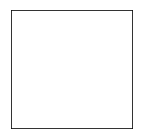

In [38]:
fig = plt.figure(figsize=(10,10))

for i in range(0, 16, 2):
    ax = fig.add_subplot(4, 4, i+1, xticks=[], yticks=[])
    ax.imshow(X_train[i,:].reshape(im_size, im_size, 3), interpolation='nearest')
    ax = fig.add_subplot(4, 4, i+2, xticks=[], yticks=[])
    ax.imshow(y_train[i,:].reshape(im_size, im_size, 2)[:,:,0], interpolation='nearest')

plt.show()

In [ ]:
batch_size = 32
epochs = 100
num_classes = 17

model = Sequential()

# Encoder
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Decoder
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))

model.add(Deconvolution2D(128, 2, 2, subsample=(2, 2), bias=False))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))

model.add(Deconvolution2D(32, 2, 2, output_shape=(None, im_size, im_size, 1), subsample=(2, 2), bias=False))
model.add(Activation('relu'))
model.add(Conv2D(2, (3, 3), padding='same'))
_, curr_width, curr_height, curr_channels = model.layers[-1].output_shape
model.add(Reshape((curr_width * curr_height, curr_channels)))
model.add(Activation('softmax'))

opt = keras.optimizers.Adam(lr=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

In [ ]:
#train the model
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=50,
          validation_data=(X_test, y_test),
          shuffle=True)

In [ ]:
# Score trained model.
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

In [ ]:
# Save model weights
save_dir = 'models'
model_name = 'flowers_segmentation_model.h5'
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)

In [ ]:
# plot predictions vs truth
num_samples = 20
fig = plt.figure(figsize=(10, 2*num_samples))

for i in range(0, 4*num_samples, 4):
    segment_pred = model.predict(np.array([X_test[i,...]]))
    ax = fig.add_subplot(num_samples, 4, i+1, xticks=[], yticks=[])
    segment_truth = y_test[i,:].reshape(im_size, im_size, 2)[:,:,1]
    ax.imshow(X_test[i,:].reshape(im_size, im_size, 3), interpolation='nearest')
    ax = fig.add_subplot(num_samples, 4, i+2, xticks=[], yticks=[])
    ax.imshow(segment_truth, interpolation='nearest')
    ax = fig.add_subplot(num_samples, 4, i+3, xticks=[], yticks=[])
    ax.imshow(segment_pred.reshape(im_size, im_size, 2)[:,:,1], interpolation='nearest')
    ax = fig.add_subplot(num_samples, 4, i+4, xticks=[], yticks=[])
    
    binary_pred = segment_pred.reshape(im_size, im_size, 2)[:,:,1] > 0.5
    ax.imshow(binary_pred, interpolation='nearest')

    binary_pred_flat = binary_pred.reshape(im_size* im_size)
    segment_truth_flat = segment_truth.reshape(im_size* im_size)
    
    intersection = np.sum((binary_pred_flat + segment_truth_flat == 2.0))
    union = np.sum(np.clip((binary_pred_flat + segment_truth_flat), 0.0, 1.0))

    iou = intersection/union
    ax.set_title('IOU = {}'.format(iou))
    
plt.show()